In [86]:
# ---------sklearn GaussianMixture-----
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D #3维绘图
n_samples = 300
np.random.seed(0)

In [87]:
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
shifted_gaussian2 = np.random.randn(n_samples, 2) + np.array([-10, 15])

In [88]:
C = np.array([[0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [89]:
X_train = np.vstack([shifted_gaussian, stretched_gaussian,shifted_gaussian2])

In [90]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [91]:
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [92]:
x = np.linspace(-20, 30)
y = np.linspace(-20, 40)

In [93]:
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)

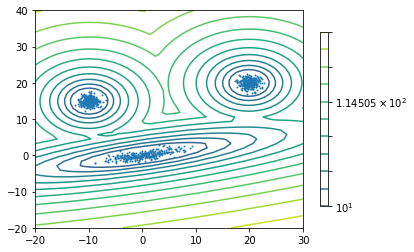

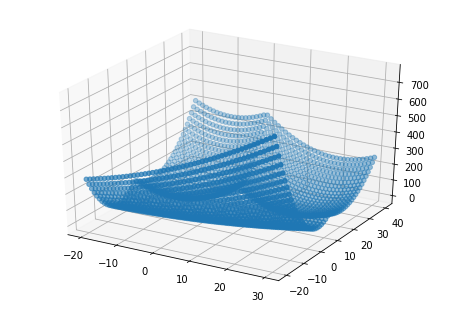

In [94]:
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000), levels=np.logspace(1, 4, 18))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)
plt.show()
# 3D绘图
fig = plt.figure()
ax = Axes3D(fig)
# ax.scatter(X,Y,Z)
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)
plt.show()